In [ ]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 4.9 MB/s 
     |████████████████████████████████| 9.8 MB 33.2 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196206 sha256=8058e0160006b0f7976de30f0cd49611605c5ff66748353b3030ea12fed8c4af
  Stored in directory: /root/.cache/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7bd39b8ebcb4bc6c2fe
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=1a84d6253e9eb357cf9482b7d10acc7c20206500dd2dc9044e00f2720493fb88
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
!pip install semopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.2 MB/s 
  Created wheel for semopy: filename=semopy-2.3.9-py3-none-any.whl size=1657805 sha256=b24ff3573d62beb8072c9201642db6f0e8ea651098b7a8fbb2cae2cf434805cb
  Stored in directory: /root/.cache/pip/wheels/6e/7c/8d/e50ec69d2674e8bc29217ea96f904e4aec6b9df9a585cf7e24
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=5cb540f201fe53afe7f7deb116c30937eb6949a272a95c341ef7560b5b2bd449
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built semopy sklearn


In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import seaborn as sn
import matplotlib.pyplot as plt
import pingouin as pg
import semopy
from semopy import Model
from semopy import Optimizer
from semopy.inspector import inspect
from semopy import gather_statistics
import semopy as sem

In [ ]:
dados = pd.read_excel('dados.xlsx',index_col = 'id')

In [ ]:
dados.head()

,P1_1,P1_2,P1_3,P1_4,P1_5,P1_6,P2_1,P2_2,P2_3,P2_4,...,P4_5,P4_6,P5_1,P5_2,P5_3,P5_4,P5_5,P5_6,P5_7,P5_8
id,,,,,,,,,,,,,,,,,,,,,
1,4,4,5,1,4.0,1,1.0,4,5,2,...,5,5,5,5,1,2,4,5.0,4,1
2,4,4,3,5,3.0,3,4.0,4,4,3,...,4,4,3,2,1,4,3,3.0,3,2
3,5,5,2,5,2.0,5,4.0,2,2,2,...,5,5,4,3,2,5,1,3.0,3,2
4,4,5,3,5,2.0,3,3.0,2,4,4,...,5,3,5,4,3,5,5,NaN,1,3
5,2,4,4,2,3.0,4,2.0,3,2,4,...,5,5,3,2,1,1,2,2.0,1,1


In [ ]:
for coluna in dados.columns.values:
    dados[coluna].fillna(dados[coluna].median(),inplace=True)

In [ ]:
dados.head()

,P1_1,P1_2,P1_3,P1_4,P1_5,P1_6,P2_1,P2_2,P2_3,P2_4,...,P4_5,P4_6,P5_1,P5_2,P5_3,P5_4,P5_5,P5_6,P5_7,P5_8
id,,,,,,,,,,,,,,,,,,,,,
1,4,4,5,1,4.0,1,1.0,4,5,2,...,5,5,5,5,1,2,4,5.0,4,1
2,4,4,3,5,3.0,3,4.0,4,4,3,...,4,4,3,2,1,4,3,3.0,3,2
3,5,5,2,5,2.0,5,4.0,2,2,2,...,5,5,4,3,2,5,1,3.0,3,2
4,4,5,3,5,2.0,3,3.0,2,4,4,...,5,3,5,4,3,5,5,3.0,1,3
5,2,4,4,2,3.0,4,2.0,3,2,4,...,5,5,3,2,1,1,2,2.0,1,1


In [ ]:
correlacao = dados.corr()

In [ ]:
correlacao

,P1_1,P1_2,P1_3,P1_4,P1_5,P1_6,P2_1,P2_2,P2_3,P2_4,...,P4_5,P4_6,P5_1,P5_2,P5_3,P5_4,P5_5,P5_6,P5_7,P5_8
P1_1,1.000000,0.714633,-0.153284,0.625202,0.091422,0.660219,0.052536,-0.215789,-0.033236,-0.128914,...,0.319728,0.098919,0.478749,0.240584,0.212049,0.245813,0.135210,0.228826,0.328108,0.046880
P1_2,0.714633,1.000000,-0.158422,0.562749,0.026822,0.626533,-0.132437,-0.151342,-0.156293,-0.050847,...,0.249105,0.081036,0.382106,0.384721,0.223197,0.271024,0.321603,0.199174,0.311301,0.163928
P1_3,-0.153284,-0.158422,1.000000,-0.164027,0.442504,-0.223918,0.113251,0.320799,0.265612,0.238573,...,-0.032673,0.106289,0.068122,0.060366,0.038812,-0.041576,0.091412,0.257979,0.043748,0.209222
P1_4,0.625202,0.562749,-0.164027,1.000000,0.180076,0.627717,0.120150,-0.372753,-0.193526,0.010645,...,0.339669,0.183537,0.127234,0.219783,0.138962,0.166701,0.076827,-0.073650,0.222002,0.032921
P1_5,0.091422,0.026822,0.442504,0.180076,1.000000,0.073752,0.207509,0.137658,0.120820,0.033054,...,-0.075630,-0.036553,-0.028834,-0.078113,-0.005339,-0.181842,-0.038691,-0.003455,0.123832,0.115329
P1_6,0.660219,0.626533,-0.223918,0.627717,0.073752,1.000000,-0.066429,-0.334485,-0.322806,-0.164933,...,0.278060,0.160169,0.148073,0.088555,-0.059917,0.055289,-0.027225,-0.126032,0.044582,-0.082710
P2_1,0.052536,-0.132437,0.113251,0.120150,0.207509,-0.066429,1.000000,0.212371,0.265187,0.546639,...,0.194145,0.149181,0.088284,0.063046,0.081432,0.043161,-0.048910,0.014720,0.108461,0.224113
P2_2,-0.215789,-0.151342,0.320799,-0.372753,0.137658,-0.334485,0.212371,1.000000,0.676553,0.331944,...,-0.013934,0.029788,0.189671,-0.007734,0.143391,0.205343,0.034635,0.208504,-0.043712,-0.000949
P2_3,-0.033236,-0.156293,0.265612,-0.193526,0.120820,-0.322806,0.265187,0.676553,1.000000,0.179423,...,0.125915,0.074360,0.279085,-0.078207,0.129598,0.060474,0.178010,0.342301,-0.101675,0.098774
P2_4,-0.128914,-0.050847,0.238573,0.010645,0.033054,-0.164933,0.546639,0.331944,0.179423,1.000000,...,0.275664,0.224503,0.181265,0.239664,0.255368,0.256416,0.128299,0.238906,0.255013,0.208527


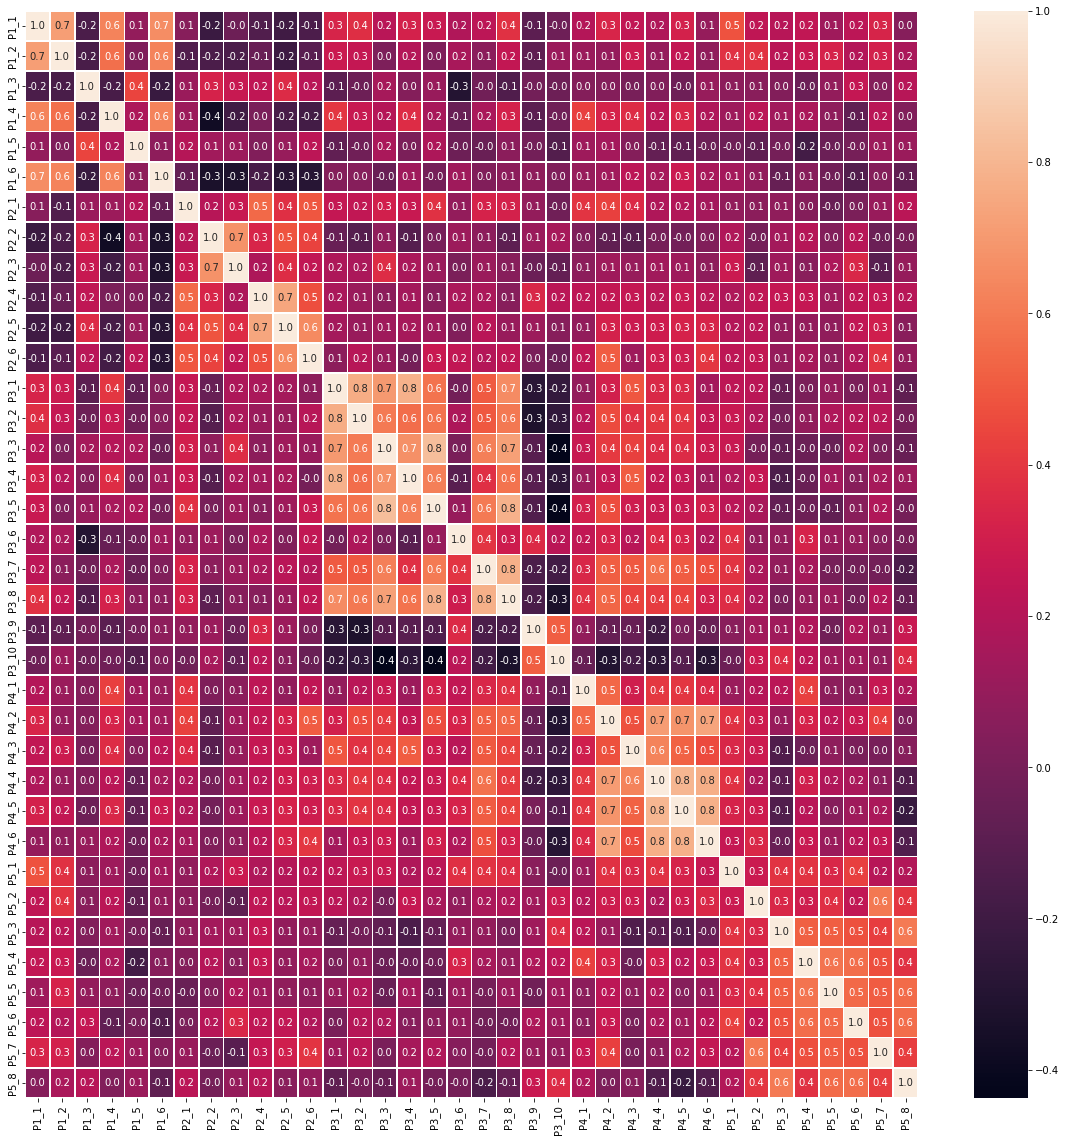

In [ ]:
fig, plot = plt.subplots(figsize=(20,20))   
plot = sn.heatmap(correlacao, annot=True, fmt=".1f", linewidths=.6)
plot

In [ ]:
pg.cronbach_alpha(data=dados)

(0.8736236159605654, array([0.814, 0.921]))

                   orcamento_apertado ~ orcamento_facil + estilos_lideranca + ambiguidade_papeis + conflito_papeis
                   orcamento_facil ~ orcamento_apertado + estilos_lideranca + ambiguidade_papeis + conflito_papeis
                   estilos_lideranca ~ orcamento_apertado + orcamento_facil + ambiguidade_papeis + conflito_papeis
                   ambiguidade_papeis ~ orcamento_apertado + estilos_lideranca + orcamento_facil + conflito_papeis
                   conflito_papeis ~ orcamento_apertado + estilos_lideranca + ambiguidade_papeis + orcamento_facil

                   orcamento_apertado ~ orcamento_facil
                   orcamento_apertado ~ estilos_lideranca
                   orcamento_apertado ~ ambiguidade_papeis
                   orcamento_apertado ~  conflito_papeis

                   orcamento_facil ~ orcamento_apertado
                   orcamento_facil ~ estilos_lideranca
                   orcamento_facil ~ ambiguidade_papeis
                   orcamento_facil ~  conflito_papeis

                   estilos_lideranca ~ orcamento_facil
                   estilos_lideranca ~ orcamento_apertado
                   estilos_lideranca ~ ambiguidade_papeis
                   estilos_lideranca ~  conflito_papeis

                   ambiguidade_papeis ~ orcamento_facil
                   ambiguidade_papeis ~ estilos_lideranca
                   ambiguidade_papeis ~ orcamento_apertado
                   ambiguidade_papeis ~  conflito_papeis

                   conflito_papeis ~ orcamento_facil
                   conflito_papeis ~ estilos_lideranca
                   conflito_papeis ~ ambiguidade_papeis
                   conflito_papeis ~  orcamento_apertado
                   

In [ ]:
modelo_geral = """ 
                   orcamento_apertado =~ P1_1 + P1_2 + P1_3 + P1_4 + P1_5 + P1_6
                   orcamento_facil =~ P2_1 + P2_2 + P2_3 + P2_4 + P2_5 + P2_6
                   estilos_lideranca =~ P3_1 + P3_2 + P3_3 + P3_4 + P3_5 + P3_6 + P3_7 + P3_8 + P3_9 + P3_10
                   ambiguidade_papeis =~ P4_1 + P4_2 + P4_3 + P4_4 + P4_5 + P4_6
                   conflito_papeis =~ P5_1 + P5_2 + P5_3 + P5_4 + P5_5 + P5_6 + P5_7 + P5_8
                   orcamento_apertado ~ orcamento_facil + estilos_lideranca + ambiguidade_papeis + conflito_papeis
                   orcamento_facil ~ orcamento_apertado + estilos_lideranca + ambiguidade_papeis + conflito_papeis
                   estilos_lideranca ~ orcamento_apertado + orcamento_facil + ambiguidade_papeis + conflito_papeis
                   ambiguidade_papeis ~ orcamento_apertado + estilos_lideranca + orcamento_facil + conflito_papeis
                   conflito_papeis ~ orcamento_apertado + estilos_lideranca + ambiguidade_papeis + orcamento_facil
               """

In [ ]:
modelo = Model(modelo_geral)
modelo.fit(dados, obj="MLW", solver="SLSQP")

SolverResult(fun=26.739703030758726, success=True, n_it=55, x=array([ 1.04068405, -0.26654446,  0.98378206,  0.09004561,  1.10743033,
        0.89035453,  0.71101439,  1.31057631,  1.55092761,  1.28882007,
        0.89569775,  1.0550566 ,  1.01718291,  1.10027024,  0.27839964,
        0.89168257,  1.07925195, -0.36743019, -0.75803196,  1.5964078 ,
        1.28266217,  1.82583272,  1.87627186,  1.68012822,  1.34300931,
        1.57603729,  2.01300055,  1.89327169,  1.9377814 ,  1.62359371,
        1.81248327, -0.23806328,  0.73450994,  0.28740026,  0.14750247,
       -0.25201548,  0.24838122,  0.27154029,  0.24982685, -0.43932758,
       -0.00705734, -1.53933892,  0.60182716,  0.15347081,  0.54124485,
        0.19141657,  0.05725142,  0.17133805, -0.0652686 , -0.1327495 ,
        0.19661855,  0.92768065,  1.49121172,  0.31824152,  0.28585072,
        0.14751132,  0.31838894,  0.9324564 ,  0.2663334 ,  0.65909421,
        0.29986239,  1.24059253,  0.75336916,  1.93463183,  0.24760837,
  

In [ ]:
modelo.inspect(mode='list', what="names", std_est=True)
resultado = modelo.inspect(mode='list', what="names", std_est=True)
resultado.to_excel('resultado.xlsx')

In [ ]:
sem.calc_stats(modelo)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,574,630,1203.286636,0.0,1937.794057,0.518818,0.379043,0.318462,0.379043,0.471874,0.157849,130.520594,296.733543,26.739703


In [ ]:
g = sem.semplot(modelo, "modelo.png")

In [ ]:
                   orcamento_apertado ~ estilos_lideranca
                   orcamento_facil ~ estilos_lideranca
                   ambiguidade_papeis ~ estilos_lideranca
                   conflito_papeis ~ estilos_lideranca
                   conflito_papeis ~ ambiguidade_papeis
                   orcamento_apertado ~ ambiguidade_papeis
                   orcamento_facil ~ ambiguidade_papeis
                   orcamento_apertado ~ conflito_papeis
                   orcamento_facil ~ conflito_papeis

In [ ]:
modelo_geral2 = """ 
                   orcamento_apertado =~ P1_1 + P1_2 + P1_3 + P1_4 + P1_5 + P1_6
                   orcamento_facil =~ P2_1 + P2_2 + P2_3 + P2_4 + P2_5 + P2_6
                   estilos_lideranca =~ P3_1 + P3_2 + P3_3 + P3_4 + P3_5 + P3_6 + P3_7 + P3_8 + P3_9 + P3_10
                   ambiguidade_papeis =~ P4_1 + P4_2 + P4_3 + P4_4 + P4_5 + P4_6
                   conflito_papeis =~ P5_1 + P5_2 + P5_3 + P5_4 + P5_5 + P5_6 + P5_7 + P5_8


               """

In [ ]:
modelo2 = Model(modelo_geral2)
modelo2.fit(dados, obj="MLW", solver="SLSQP")

SolverResult(fun=26.739705132379754, success=True, n_it=66, x=array([ 1.04073258, -0.26658471,  0.98386202,  0.09001712,  1.10732334,
        0.88921605,  0.7101294 ,  1.30866308,  1.54897766,  1.28730413,
        0.89539453,  1.05472601,  1.01702913,  1.09979357,  0.2780621 ,
        0.89137807,  1.07880758, -0.36734436, -0.75778478,  1.59877174,
        1.28467091,  1.82855305,  1.87896858,  1.68260665,  1.34153706,
        1.57470452,  2.01112315,  1.89155832,  1.93613612,  1.62210518,
        1.81100557,  0.92772021,  1.49075465,  0.31818295,  0.28581686,
        0.14751137,  0.31838317,  0.932514  ,  0.26634104,  0.65921736,
        0.29994405,  1.24076145,  0.75333504,  0.2476024 ,  0.51018912,
        0.7899508 ,  1.20593632,  1.28246351,  0.24349896,  0.74245637,
        0.69884784,  0.76747766,  1.08154714,  1.0082401 ,  0.2016941 ,
        0.4050342 ,  1.67658755,  0.79353394,  0.59542086,  0.19257687,
        0.26741598,  0.16877498,  0.72613803,  0.61193738,  1.27013256,
  

In [ ]:
modelo2.inspect(mode='list', what="names", std_est=True)
resultado2 = modelo2.inspect(mode='list', what="names", std_est=True)
resultado2.to_excel('resultado2.xlsx')

In [ ]:
sem.calc_stats(modelo2)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,584,630,1203.286731,0.0,1937.794057,0.526465,0.379043,0.330132,0.379043,0.489166,0.155243,110.52059,258.666914,26.739705


In [ ]:
g = sem.semplot(modelo2, "modelo2.png", plot_exos = False)